<a href="https://colab.research.google.com/github/athenakle/Bnfo301_Le_Athena/blob/main/BNFO301_2023_Lab7_Athena_Le.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>BNFO301 2023, Lab #7: K-mer </h1>

Most *de novo* genome assembly is done using de Bruijn graphs.  We discussed how these graphs give us a genome assembly given a set of K-1-mers in the lecture.  The the length of K is the most significant parameter of a de Bruijn graph assembly.  Sequence reads with less than K bases will not share and edge in the graph, genomic repeats longer than K will lead to forks, and a longer K will reduce the percent of "correct K-mers", when compared to a shorter K.  In this assignment, you will be tasked with detecting K-mers and evaluating K-mers.  Normally this would be done using sequence reads (e.g. Illumina paired-end reads), but here you will evaluate K given a complete genome, which provides additional insights.

Grading:

The assignment is worth 20 points and will be completed over two meetings.

1.1 - create dictionary, 1 point

1.2 - find k-mers, 4 points

2.1 - generate Reverse Complement, 2 points

2.2 - find k-mers, reverse complement, 1 point

2.3 - find canonical K-mers, 5 points

3.1 - find k-mers, short sequence, 2 points

3.2 - find unique and distinct, from canonical k-mers, 5 points

4.0 - extra credit, 3 points 








### Setup
Read the Sequence Data File. 
Do not change the code, just run as is.

In [ ]:
import os.path
# Load the genbank file 
DATA_FILE_GITHUB = "https://raw.githubusercontent.com/boydvcu/BNFO301_2023/main/homosapiens_hbb_data.fasta"
DEFAULT_FILE_NAME = 'homosapiens_hbb_data.fasta'
fileName = DEFAULT_FILE_NAME
#Does the file exists locally, if not get it from the github
if not os.path.exists(fileName):
  #Load the file from Github to the local folder
  !wget --no-check-certificate --content-disposition $DATA_FILE_GITHUB
   
print("Reading file:", fileName)


Reading file: homosapiens_hbb_data.fasta


###Problem 1
**Counting K-mers** <br>
Count the total number of 7-mers in the gene contained within the downloaed file and print the first five k-mers.  This is in fasta format.

<br>
**Example return:** <br>
Total Number of 7-mers: 123 <br>
7-mer #0: ATCGCTA <br>
7-mer #1: TCGCTAG <br>
7-mer #2: CGCTAGC <br>
7-mer #3: GCTAGCG <br>
7-mer #4: CTAGCGA <br>


**Explanation and Example:**
A k-mer is a sequence of length *k* characters in a string of nucloeitides in a DNA sequence.  You need to extract all k-mers from a sequence using a sliding window of 1.  This will create a sequence that overlaps in k-1 positions. The visual below shows this concept by extracting the 4-mers from the short nucleotide string.  

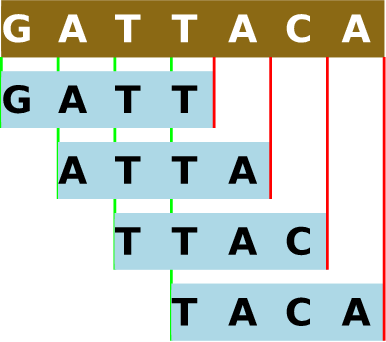



Problem 1.1) Create a function to load the file and return the sequence and its header as a dictionary.

In [ ]:
#Create function to load the file to a dictionary "sequence" with name and sequence 

def LoadFasta(filepath):
    fh = open(filepath, "r")
    data = fh.readlines()
    fh.close()

    sequences = {}
    current_sequence_name = ''
    current_sequence = ''
    
    for line in data:
        line = line.strip() 
        
        if line.startswith('>'):  
            if current_sequence_name:
                sequences[current_sequence_name] = current_sequence
            
            current_sequence_name = line[1:]
            current_sequence = ''
        else: 
            current_sequence += line
    
    if current_sequence_name:
        sequences[current_sequence_name] = current_sequence
    
    return sequences

sequences = LoadFasta(fileName)
# Parse input file to generate two lists
sequence = list(sequences.values())[0]
#Print the sequence and its length
print("Sequence length is ", len(sequence), sequence)

Sequence length is  1608 ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTGAACGTGGATGAAGTTGGTGGTGAGGCCCTGGGCAGGTTGGTATCAAGGTTACAAGACAGGTTTAAGGAGACCAATAGAAACTGGGCATGTGGAGACAGAGAAGACTCTTGGGTTTCTGATAGGCACTGACTCTCTCTGCCTATTGGTCTATTTTCCCACCCTTAGGCTGCTGGTGGTCTACCCTTGGACCCAGAGGTTCTTTGAGTCCTTTGGGGATCTGTCCACTCCTGATGCTGTTATGGGCAACCCTAAGGTGAAGGCTCATGGCAAGAAAGTGCTCGGTGCCTTTAGTGATGGCCTGGCTCACCTGGACAACCTCAAGGGCACCTTTGCCACACTGAGTGAGCTGCACTGTGACAAGCTGCACGTGGATCCTGAGAACTTCAGGGTGAGTCTATGGGACGCTTGATGTTTTCTTTCCCCTTCTTTTCTATGGTTAAGTTCATGTCATAGGAAGGGGATAAGTAACAGGGTACAGTTTAGAATGGGAAACAGACGAATGATTGCATCAGTGTGGAAGTCTCAGGATCGTTTTAGTTTCTTTTATTTGCTGTTCATAACAATTGTTTTCTTTTGTTTAATTCTTGCTTTCTTTTTTTTTCTTCTCCGCAATTTTTACTATTATACTTAATGCCTTAACATTGTGTATAACAAAAGGAAATATCTCTGAGATACATTAAGTAACTTAAAAAAAAACTTTACACAGTCTGCCTAGTACATTACTATTTGGAATATATGTGTGCTTATTTGCATATTCATAATCTCCCTACTTTATTTTCTTTTATTTTTAATTGATACATAATCATTATACATATTTATGGGTTAAAGTGTAATGTTTTAATATGTGTACACATATTGACCAAATCAG

Problem 1.2) Create a definition to find unique K-mers and return a cout of each K-mer.  To evaluate your work, I have given you code to print the total number of K-mers and the first five K-mers found.  

In [ ]:
# Function to find  a list of k-mers based on the value of k and s - sequence provided
def findKMers(k,sequence):
    #open a list to store your K-mers
    kmerList = []
    if len(sequence) < k:
      return kmerList
    #use the range function to generate an integer to find the start for the sliding window
    for i in range (len(sequence) - k + 1):
        #obtain a substring from base i to base i+7
        kmer = sequence[i:i+k]
        #add the k-mer to the list
        kmerList.append(kmer)
    return kmerList

kmerlist = findKMers(7,sequence)

#Provided print statement
print("Total # of 7-mers are", len(kmerlist))
for i in range(5):
    print("7-mer #" , i , ":", kmerlist[i])

Total # of 7-mers are 1602
7-mer # 0 : ACATTTG
7-mer # 1 : CATTTGC
7-mer # 2 : ATTTGCT
7-mer # 3 : TTTGCTT
7-mer # 4 : TTGCTTC


### Problem 2
Print the first 5 reverse complementary and canonical k-mers along with the original kmers from Question 1 in a table similar to the example below.


|Offset|0|1|2|3|4|
|-----|-------|-------|-------|-------|-------|
|7-mer|ATCGCTA|TCGCTAG|CGCTAGC|GCTAGCG|CTAGCGA|
|Reverse Complement|TCGCATA|CGCATAC|GCATACG|CATACGT|CATCGTA|
|Canonical|ATCGCTA|TCGCATA|CGCATAC|CATACGT|CATCGTA|

DNA is *normally* double stranded with bases paired on opposite strands read from 5' to 3'. Thus, we want to consider each location of the genome, both forward and reverse strands. Thus, we want to calcaulte the reverse complement of the sequence and extract the first 5 7-mers. 

Counting the abundance of K-mers is important.  K-mers are often presented as the canonical sequence. This is presenting the lexicographically smaller of the two reverse complementary sequences (the one that comes earliest in alphabetical order). Most k-mer counting tool will use the canonical k-mers when presenting a K-mer count. 



Problem 2.1) Create definition that returns the Reverse Compliment Sequence of the genome

In [ ]:
def createComplimantrySequence(s):
    compSequence  = ""
    # Create reverse complimentary sequence by substituting bases
    for base in s:
      #use conditional statements to obtain the complement
      # Flip A -> T
      if base == "A":
        compSequence += "T"
      # Flip T -> A
      elif base == "T":
        compSequence += "A"
      # Flip C -> G
      elif base == "C":
        compSequence += "G"
      # Flip G -> C
      elif base == "G":
        compSequence += "C"
        
      #[::-1] = how to reverse the string
    compSequence = compSequence[::-1]

    # Reverse the string
    
    return compSequence


compSequence = createComplimantrySequence(sequence)
#provided print statement
print(compSequence[0:100])

TTGCAATGAAAATAAATGTTTTTTATTAGGCAGAATCCAGATGCTCAAGGCCCTTCATAATATCCCCCAGTTTAGTAGTTGGACTTAGGGAACAAAGGAA


Problem 2.2) Count the total number of 7-mers in the reverse complement genome and print the total number of K-mers and the first five K-mers. Use the definition created in problem 1.2.

In [ ]:
'''
def createComplimentarySequence(s):
    compSequence = ""
    # Create reverse complimentary sequence by substituting bases
    for base in s:
        if base == "A":
            compSequence += "T"
        elif base == "T":
            compSequence += "A"
        elif base == "C":
            compSequence += "G"
        elif base == "G":
            compSequence += "C"
    # Reverse the string
    compSequence = compSequence[::-1]

    # Find all 7-mers in the complement sequence
    k = 4
    kmers = []
    for i in range(len(compSequence)-k+1):
        kmer = compSequence[i:i+k]
        kmers.append(kmer)

    return kmers


# Call the function to create the complementary sequence
seq = "ATCGATCG"
compSeq = createComplimentarySequence(seq)
'''
# Find all 7-mers in the complement sequence
compKmerlist = findKMers(7, compSequence)

# Print the total number of 7-mers and the first 5 7-mers
print("Total # of Complementary 7-mers are", len(compKmerlist))
for i in range(5):
    print("7-mer #", i, ":", compKmerlist[i])

Total # of Complementary 7-mers are 1602
7-mer # 0 : TTGCAAT
7-mer # 1 : TGCAATG
7-mer # 2 : GCAATGA
7-mer # 3 : CAATGAA
7-mer # 4 : AATGAAA


Problem 2.3) Create definition to find the *Canonical Sequence* for each K-mer pair (forward and reverse complement).

In [ ]:
# Expect that the sequences and reverseComplimentsSequences are of the same length and that you can rely on the order to be flipped, but correct
def createCanonicalSequeces(sequences, reverseComplimentSequences):
    #open list for cannoicalSequences, please add the cannonical sequence to the list in the following the order in list sequences
    canonicalSequences = []
    #get length of list sequences -1, will be used subsequently to compare 5'-3' and '3-5' lists
    length = len(sequences) - 1
    #provided code to validate that your lists are of the same length
    if len(sequences) != len(reverseComplimentSequences):
        return canonicalSequences
    #use the range function to navigate the list with the 5'-3' K-mers
    for i in range(len(sequences)):
        #use conditional statements to compare 5'-3' K-mers and 3'-5' K-mers, recall they are in the reverse order, you can use the intiger stored as "length" to help you with the problem
      if sequences[i] < reverseComplimentSequences[length-i]:
            canonicalSequences.append(sequences[i])
      else:
            canonicalSequences.append(reverseComplimentSequences[length-i])
            
    return canonicalSequences


canonicalSequencesList = createCanonicalSequeces(kmerlist, compKmerlist)
#Print the 7-mer count
print("Total # of canonical sequences are", len(canonicalSequencesList))
#Print first 5 Kmers
for i in range(5):
    print("7-mer #" , i , ":", canonicalSequencesList[i])

Total # of canonical sequences are 1602
7-mer # 0 : ACATTTG
7-mer # 1 : CATTTGC
7-mer # 2 : AGCAAAT
7-mer # 3 : AAGCAAA
7-mer # 4 : GAAGCAA


Check your work by printing a table using the provided code.

In [ ]:
#Print the requested table uisng format
def nicePrint(kmerlist, compKmerlist, canonicalSequencesList):
    print("{: ^20} {: ^10} {: ^10} {: ^10} {: ^10} {: ^10} ".format("Offset", 0, 1,2, 3, 4))
    print("-"*75)
    print("{: <20} {: ^10} {: ^10} {: ^10} {: ^10} {: ^10} ".format("7-mer", kmerlist[0], kmerlist[1], kmerlist[2], kmerlist[3], kmerlist[4]))
    print("{: <20} {: ^10} {: ^10} {: ^10} {: ^10} {: ^10} ".format("Reverse Complement", compKmerlist[1601], compKmerlist[1600], compKmerlist[1599], compKmerlist[1598], compKmerlist[1597]))
    print("{: <20} {: ^10} {: ^10} {: ^10} {: ^10} {: ^10} ".format("Canonical", canonicalSequencesList[0], canonicalSequencesList[1], canonicalSequencesList[2], canonicalSequencesList[3], canonicalSequencesList[4]))

nicePrint(kmerlist, compKmerlist, canonicalSequencesList)

       Offset            0          1          2          3          4      
---------------------------------------------------------------------------
7-mer                 ACATTTG    CATTTGC    ATTTGCT    TTTGCTT    TTGCTTC   
Reverse Complement    CAAATGT    GCAAATG    AGCAAAT    AAGCAAA    GAAGCAA   
Canonical             ACATTTG    CATTTGC    AGCAAAT    AAGCAAA    GAAGCAA   


### Problem 3
#### Distinct, unique, and total k-mers.  It is important to understand how often a k-mer appears in a genome.  In this problem, you are asked to find and evaluate 3-mers given a short DNA string.

For the following sequence:`AATCGGGGTATC`, calculate the total, distinct, and unique count of the canonical 3-mers. 

*Total k-mers* are the sum of k-mers that can be obtained from the sequence given the length of K and the length of the sequence.

*Distinct k-mers* are counted only once, even if they appear multiple times.

*Unique k-mers* are those that appear only once. Unique k-mers are very important for analysis. 

Problem 3.1) Find 3-mers and their compliments

In [ ]:
#create a list of distinct 3-mers in this sequence
sequence = "AATCGGGGTATC"
#Use the definition your created for problem 1.2 to find 3 mers in "sequence"
Threemerlist = findKMers(3, sequence)
#print the total number of 3-mers and the 3-mers themselves identified in the sequence
print("Total # of 3-mers are", len(Threemerlist), Threemerlist)

#Ues the definition your created for problem 2.1 to find the reverse-compliment of the sequence
comp3Sequence = createComplimantrySequence(sequence)
#Ues the definition your created for problem 1.2 to find 3 mers in "compSequence"
comp3merlist = findKMers(3, comp3Sequence)
#print the total number of 3-mers and the 3-mers themselves identified in the reverse-complement
print("Total Reverse Compliment 3-mers found are", len(comp3merlist), comp3merlist)

Total # of 3-mers are 10 ['AAT', 'ATC', 'TCG', 'CGG', 'GGG', 'GGG', 'GGT', 'GTA', 'TAT', 'ATC']
Total Reverse Compliment 3-mers found are 10 ['GAT', 'ATA', 'TAC', 'ACC', 'CCC', 'CCC', 'CCG', 'CGA', 'GAT', 'ATT']


Problem 3.2) Find canonical, distinct, and unique K-mers given the list of 3-mers created in the part a

In [ ]:
# Create a definition that will produce a list of distinct K-mers, given a list of K-mers
def createDistinctList(l):
    if len(l) == 0:
        return l
    #open your list
    distinctlist = []
    #use the range and len functions to move through the list
    for i in range(len(l)):
      n = l[i]
        #create a conditional statement and use "not in" to determine if the K-mer is in the new list, if not add it
      if n not in distinctlist:
        distinctlist.append(n)

    return distinctlist

# Create a defintion to find a unique list, given a list of K-mers
def createUniqueList(l):
    if len(l) == 0:
        return l
    #open your list
    uniquelist = []
    #an easy way to accomplish this task, is to create a dictionary with the k-mer as the key and its count as the value
    d = {}
    #use the range and len functions to move through the lsit
    for i in range(len(l)):
      n = l[i]
        
        #count elements and keep count in the value
      if n not in d.keys():
        d[n] = 1
      else:
        d[n] += 1


    #check for elements with a count of 1 and add them to your list
    for key, value in d.items():
      if value == 1:
        uniquelist.append(key)

   
    return uniquelist

# Find canonical sequences from the 3-mers
cantonical3merList = createCanonicalSequeces(Threemerlist, comp3merlist)
print("Canonical 3-mers  are", len(cantonical3merList), cantonical3merList)

distinctList = createDistinctList(cantonical3merList)
print("Total distinct Kmers found are ", len(distinctList), distinctList)

uniqueList =  createUniqueList(cantonical3merList)
print("Total Unique Kmers found are ", len(uniqueList), uniqueList)

Canonical 3-mers  are 10 ['AAT', 'ATC', 'CGA', 'CCG', 'CCC', 'CCC', 'ACC', 'GTA', 'ATA', 'ATC']
Total distinct Kmers found are  8 ['AAT', 'ATC', 'CGA', 'CCG', 'CCC', 'ACC', 'GTA', 'ATA']
Total Unique Kmers found are  6 ['AAT', 'CGA', 'CCG', 'ACC', 'GTA', 'ATA']


### Problem 4
#### For the sequence provided in Question 1, create a definition to find the smallest k-mer size where every k-mer is unique for the sequence (i.e. number of unique,distinct and total k-mers are the equal number).  Start with K=2 and keep adding 1 until the objective is reached.




In [ ]:
#Finds the total, unique and distinct K-mer counts
def findKmerTypes(k, sequence):
    totalKmerlist = findKMers(k, sequence)
    uniqueList = list(set(totalKmerlist))
    distinctList = []
    for kmer in uniqueList:
        if totalKmerlist.count(kmer) == 1:
            distinctList.append(kmer)
    return (len(totalKmerlist), len(uniqueList), len(distinctList))

# Use the fasta loader to obtain the original HBB sequence from question 1
sequences = LoadFasta(fileName)
sequence = list(sequences.values())[0]

# Find the smallest k-mer size where every k-mer is unique
k = 2
while True:
    kmer_counts = findKmerTypes(k, sequence)
    if kmer_counts[0] == kmer_counts[1] == kmer_counts[2]:
        break
    k += 1

print("Smallest k-mer size where every k-mer is unique:", k)


Smallest k-mer size where every k-mer is unique: 14
